In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import  yaml

with open("/home/mchorse/gpt-neox/benchmarking/configs/inference_test.yml", "r") as f:
    config = yaml.safe_load(f)

models = config["models"]
world_size = config["world_size"]
trials = config["trials"]
max_tokens = config["max_tokens"]

models = [x.split("/")[-1] for x in models]
ds_files = ["/home/mchorse/inference_benchmark/deepspeed/max_tokens_128/world_size_1/{}_float16_benchmark.csv".format(x) for x in models]

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
hf_files = ["/home/mchorse/inference_benchmark/hf/max_tokens_128/world_size_1/{}_float16_benchmark.csv".format(x) for x in models]

In [9]:
ds_dfs = [pd.read_csv(x) for x in ds_files]
hf_dfs = [pd.read_csv(x) for x in hf_files]
ds_means = [x["(e2e) latency"].iloc[3:].mean() for x in ds_dfs]
ds_std = [x["(e2e) latency"].iloc[3:].std() for x in ds_dfs]
hf_means = [x["(e2e) latency"].iloc[3:].mean() for x in hf_dfs]
hf_std = [x["(e2e) latency"].iloc[3:].std() for x in hf_dfs]

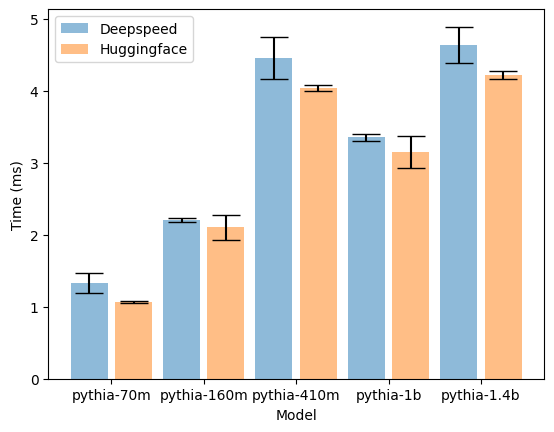

In [11]:
# Create the figure and axes objects
fig, ax = plt.subplots()
# Create the bar plot with error bars
ax.bar(
    np.arange(len(ds_means)) - 0.24,
    ds_means, yerr=ds_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Deepspeed')
ax.bar(
    np.arange(len(hf_means)) + 0.24,
    hf_means, yerr=hf_std, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Huggingface')

# Set the x-axis tick labels to be the index of the values list
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)

# Set the labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Time (ms)')

plt.legend()
plt.show()

In [21]:
import sys
sys.path.insert(0, '/home/mchorse/gpt-neox')
from megatron.text_generation_utils import generate_samples_from_prompt
from megatron.utils import print_rank_0, setup_for_inference_or_eval
from megatron.neox_arguments import NeoXArgs
from megatron.training import setup_model_and_optimizer
from megatron.initialize import initialize_megatron

neox_args = NeoXArgs.from_ymls(
    ["/home/mchorse/gpt-neox/configs/19M.yml",
     "/home/mchorse/gpt-neox/configs/local_setup.yml",
     "/home/mchorse/gpt-neox/configs/benchmarking.yml"])
neox_args.configure_distributed_args()
neox_args.build_tokenizer()


FileNotFoundError: [Errno 2] No such file or directory: 'data/gpt2-vocab.json'

In [22]:
use_cache = True
initialize_megatron(neox_args)
model, _, _ = setup_model_and_optimizer(
    neox_args=neox_args,
    use_cache=use_cache,
    iteration=neox_args.iteration,
    )  # we use setup_model_and_optimizer instead of get_model in order to initialize deepspeed
print_rank_0("Finished loading model")

model.module.inference_mode(use_cache=use_cache)

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [12]:
generate_samples_from_prompt(neox_args, )

NeoXArgs(distributed_backend='nccl', local_rank=None, rank=None, lazy_mpu_init=False, short_seq_prob=0.1, eod_mask_loss=False, adlr_autoresume=False, adlr_autoresume_interval=1000, seed=1234, onnx_safe=False, deepscale=False, deepscale_config=None, deepspeed_mpi=False, deepspeed_slurm=False, user_script=None, iteration=None, do_train=None, do_valid=None, do_test=None, save_iters=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 900

In [19]:
neox_args.load

'checkpoints'